# Data processing using scikit-learn

In this tutorial a processing pipeline for the **Sensorless Drive Diagnosis** dataset will be used. Features are extracted from electric current drive signals. The drive has intact and defective components. This results in 11 different classes with different conditions. Each condition has been measured several times by 12 different operating conditions, this means by different speeds, load moments and load forces. The current signals are measured with a current probe and an oscilloscope on two phases.

## Loading the data

We will start by loading the data and printing its size, the number of features that describe its sample, and the total number of classes.

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn

X = np.load('X.npy')
Y = np.load('Y.npy')

print("The dataset contains %d samples distributed into %d classes." % (X.shape[0], int(np.max(Y)+1)))
print("Each sample is represented by %d features." % (X.shape[1]))

The dataset contains 2200 samples distributed into 11 classes.
Each sample is represented by 48 features.


## Dimension reduction and visualization

In the following we will visualize the data. Since we cannot vizualize it in 48 dimensions, we will employ PCA to reduce the dimension. Specifically, we reduce the dimension by using the 2 principal components of the data, this way we will be able to visualize the data in a 2-dimensional space. At the same time we also present the explained variance of the data when a different number of principal components are used to reduce the dimension. 

In the following we emply PCA **without applying any preprocessing** on the data.

In [17]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
X_norm = preprocessing.normalize(X)


var_pca = []
var_pca_scaled = []
var_pca_norm = []
for i in range(10):
    pca = PCA(n_components = i, whiten=True)
    X_reduced = pca.fit_transform(X)
    var = pca.explained_variance_ratio_.sum()
    var_pca.append(var)
    
    X_reduced_scaled = pca.fit_transform(X_scaled)
    var = pca.explained_variance_ratio_.sum()
    var_pca_scaled.append(var)
    
    X_reduced_scaled = pca.fit_transform(X_norm)
    var = pca.explained_variance_ratio_.sum()
    var_pca_norm.append(var)
    
var_pca_all = [var_pca, var_pca_scaled, var_pca_norm]
X_all = [X, X_scaled, X_norm]

Next, we define different colors for visualizing samples belonging to dofferent classes, and then we plot the projection of the data into a 2 dimensional space and the "explained variance vs number of components" graph. In the first row of the produced figure we present the results without pre-processing the data, in the second row the results after scaling the data, and in the third row the results after normalizing the data. 

**Scaling** operation transforms the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

**Normalization** operation scales individual samples to have unit norm.

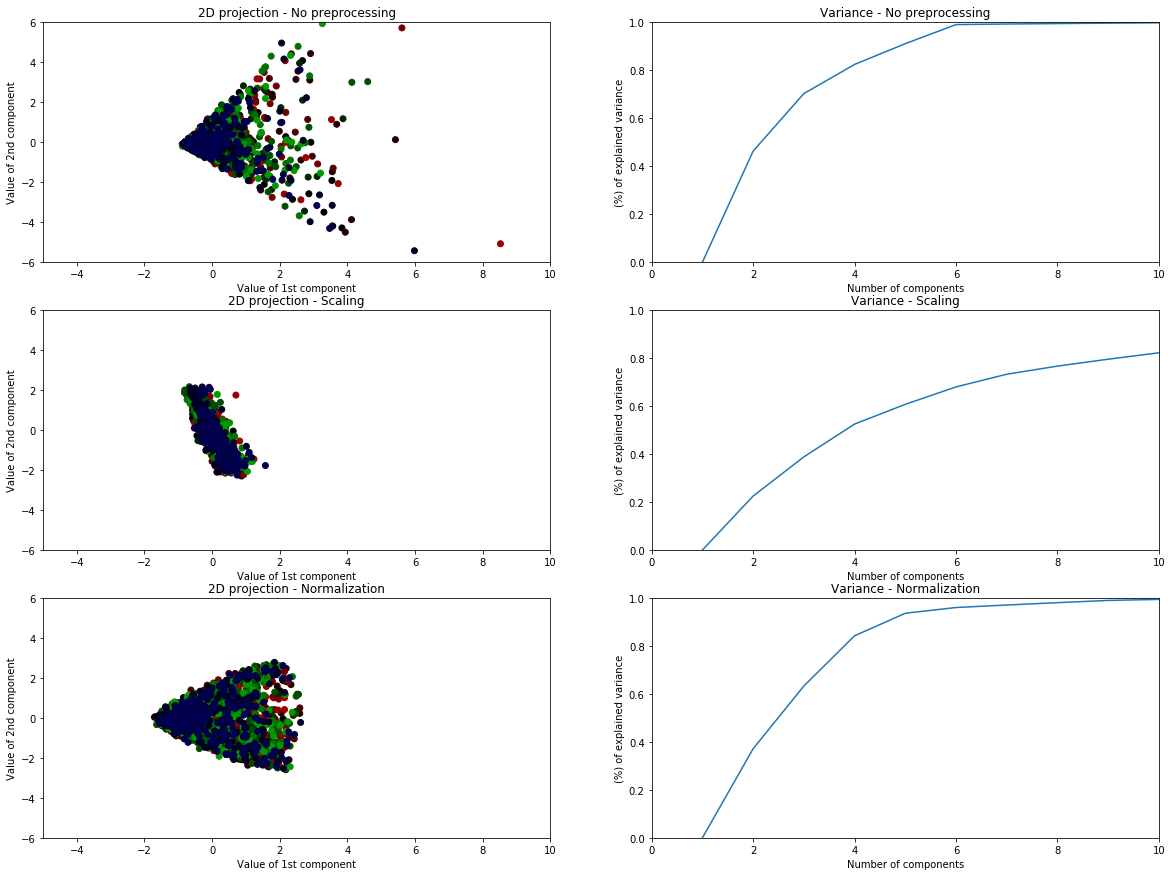

In [18]:
colors = []
for i in Y:
    if i<5:
        colors.append(((i)*0.15, 0, 0))
    elif i>=5 and i<9:
        colors.append((0, (i-4)*0.15, 0))
    else:
        colors.append((0, 0, (i-8)*0.15))
        
titles_a = ["Variance - No preprocessing", "Variance - Scaling", "Variance - Normalization"]
titles_b = ["2D projection - No preprocessing", "2D projection - Scaling", "2D projection - Normalization"]
fig = plt.figure(1, figsize=(20, 15))
for i in range(3):
    idx = '3'+'2'+str(i*2+2)
    idx = int(idx)
    plt.subplot(idx)
    plt.plot(np.arange(10)+1, var_pca_all[i])
    plt.xlim(0,10)
    plt.ylim(0,1)
    plt.title(titles_a[i])
    plt.xlabel('Number of components')
    plt.ylabel('(%) of explained variance')
    
    pca = PCA(n_components = 2, whiten=True)
    X_reduced = pca.fit_transform(X_all[i])
    
    idx = '3'+'2'+str(i*2+1)
    idx = int(idx)
    plt.subplot(idx)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], c=colors)
    plt.xlim(-5,10)
    plt.ylim(-6,6)
    plt.title(titles_b[i])
    plt.xlabel('Value of 1st component')
    plt.ylabel('Value of 2nd component')
    
plt.show()

## Feature importances / selection

In order to see which of the 48 features are the most important for the classification task, we will use the **ExtraTreeClassifier** for scikit learn. In the figure below, the bars are the feature importances of the forest, along with their inter-trees variability. The importances of the featues always sums to one.

In order to conclude about the feature importances in scikit-learn the **Gini Importance** or **Mean Decrease Impurity** metric ise used. The importance of a feature using this metric is defined as the sum over the number of splits (across all tress) that include the feature, proportionally to the number of samples it splits. 


(0, 0.2)

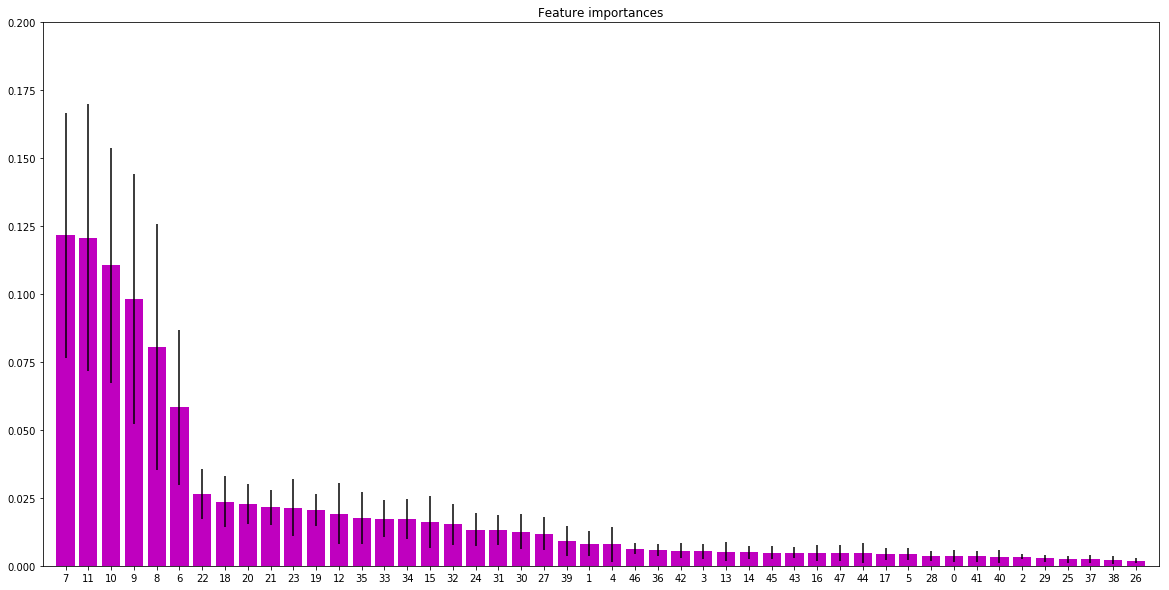

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=10, random_state=0)
forest.fit(X_scaled, Y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(4, figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X_scaled.shape[1]), importances[indices], color="m", yerr=std[indices], align="center")
plt.xticks(range(X_scaled.shape[1]), indices)
plt.xlim([-1, X_scaled.shape[1]])
plt.ylim(0,0.2)

Since we know what is the importance of each one of the features, we will continue with the classification task by selecting the 10 most important features.

## Building a classifier

We start by building a linear classifier, specifically we will use **Logistic Regression**. We will split the dataset into training and testing sets. For training we will use 80% of the sample and the rest 20% will be used for testing the accuracy of the classifier. In the following figure the accuracy of the classifier on testing and traing set with respect to the number of features used is presented.

Training logistic regression with 2 features.
Training logistic regression with 3 features.
Training logistic regression with 4 features.
Training logistic regression with 5 features.
Training logistic regression with 6 features.
Training logistic regression with 7 features.
Training logistic regression with 8 features.
Training logistic regression with 9 features.
Training logistic regression with 10 features.
Training logistic regression with 11 features.
Training logistic regression with 12 features.
Training logistic regression with 13 features.
Training logistic regression with 14 features.
Training logistic regression with 15 features.
Training logistic regression with 16 features.
Training logistic regression with 17 features.
Training logistic regression with 18 features.
Training logistic regression with 19 features.
Training logistic regression with 20 features.
Training logistic regression with 21 features.
Training logistic regression with 22 features.
Training logistic reg

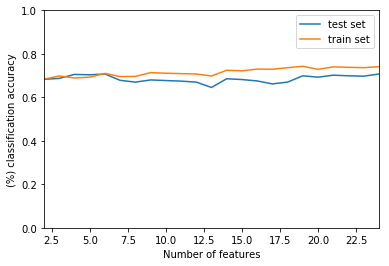

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scores_train_logreg = []
scores_test_logreg = []
for i in range(23):
    #print 'Training logistic regression with', i+2, 'features'
    print("Training logistic regression with %d features." % (i+2))
    X_feat = X_scaled[:,indices[:i+2]]
    X_train, X_test, y_train, y_test = train_test_split(X_feat, Y, test_size=0.5, random_state=42)   
    logreg = linear_model.LogisticRegression(C=1e5)
    logreg.fit(X_train, y_train)
    score = logreg.score(X_test, y_test)    
    scores_test_logreg.append(score)
    score = logreg.score(X_train, y_train)    
    scores_train_logreg.append(score)
    
plt.figure(5)
plt.plot([i+2 for i in range(23)], scores_test_logreg, label='test set')
plt.plot([i+2 for i in range(23)], scores_train_logreg, label='train set')
plt.xlim(2,24)
plt.ylim(0,1)
plt.xlabel('Number of features')
plt.ylabel('(%) classification accuracy')
plt.legend()

In the following we will do the same using a nonlinear classifier. Specifically, we will use a **Fully Connected Neural Network** with one hidden layer of 24 neurons.

Training logistic regression with 2 features.
Training logistic regression with 3 features.
Training logistic regression with 4 features.
Training logistic regression with 5 features.
Training logistic regression with 6 features.
Training logistic regression with 7 features.
Training logistic regression with 8 features.
Training logistic regression with 9 features.
Training logistic regression with 10 features.
Training logistic regression with 11 features.
Training logistic regression with 12 features.
Training logistic regression with 13 features.
Training logistic regression with 14 features.
Training logistic regression with 15 features.
Training logistic regression with 16 features.
Training logistic regression with 17 features.
Training logistic regression with 18 features.
Training logistic regression with 19 features.
Training logistic regression with 20 features.
Training logistic regression with 21 features.
Training logistic regression with 22 features.
Training logistic reg

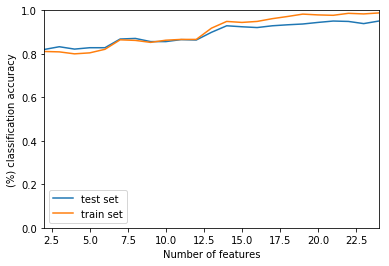

In [21]:
from sklearn.neural_network import MLPClassifier

scores_train_mlp = []
scores_test_mlp = []
for i in range(23):
    #print 'Training neural network with', i+2, 'features'
    print("Training neural network with %d features." % (i+2))
    X_feat = X_scaled[:,indices[:i+2]]
    X_train, X_test, y_train, y_test = train_test_split(X_feat, Y, test_size=0.5, random_state=42)
    clf = MLPClassifier(solver='adam', activation='relu', alpha=1e-5, hidden_layer_sizes=(24,), max_iter=1000)
    clf.fit(X_train, y_train)
    score_mlp = clf.score(X_test, y_test)
    scores_test_mlp.append(score_mlp)
    score_mlp = clf.score(X_train, y_train)
    scores_train_mlp.append(score_mlp)
    
plt.figure(6)
plt.plot([i+2 for i in range(23)], scores_test_mlp, label='test set')
plt.plot([i+2 for i in range(23)], scores_train_mlp, label='train set')
plt.xlim(2,24)
plt.ylim(0,1)
plt.xlabel('Number of features')
plt.ylabel('(%) classification accuracy')
plt.legend(loc='best')

5-Fold cross validation

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn import neighbors, linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

X_feat = X_scaled[:,indices[:20]]

logistic = linear_model.LogisticRegression(C=1e5)
knn = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')
mlp = MLPClassifier(solver='adam', activation='relu', alpha=1e-5, hidden_layer_sizes=(24,), max_iter=1000)
svm = SVC(C=10.0, kernel='linear')
tree = DecisionTreeClassifier()
randForest = RandomForestClassifier()
adaBoost = AdaBoostClassifier(n_estimators=1000, algorithm='SAMME')

skf = StratifiedKFold(n_splits=5)

logistic_l = []
knn_l = []
mlp_l = []
svm_l =[]
tree_l = []
randForest_l = []
adaBoost_l = []

counter = 1
for train_index, test_index in skf.split(X_feat, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    print('Test set accuracy for fold: %d' % counter)
    print('LogisticRegression score: %f' % logistic.fit(X_train, Y_train).score(X_test, Y_test))
    logistic_l.append(logistic.score(X_test, Y_test))
    print('KNN score: %f' % knn.fit(X_train, Y_train).score(X_test, Y_test))
    knn_l.append(knn.score(X_test, Y_test))
    print('MLP score: %f' % mlp.fit(X_train, Y_train).score(X_test, Y_test))
    mlp_l.append(mlp.score(X_test, Y_test))
    print('SVM score: %f' % svm.fit(X_train, Y_train).score(X_test, Y_test))
    svm_l.append(svm.score(X_test, Y_test))
    print('Tree score: %f' % tree.fit(X_train, Y_train).score(X_test, Y_test))
    tree_l.append(tree.score(X_test, Y_test))
    print('Random Forest score: %f' % randForest.fit(X_train, Y_train).score(X_test, Y_test))
    randForest_l.append(randForest.score(X_test, Y_test))
    print('AdaBoost score: %f' % adaBoost.fit(X_train, Y_train).score(X_test, Y_test))
    adaBoost_l.append(adaBoost.score(X_test, Y_test))
    
    counter += 1
    
print('Average performance for all folds')
print('LogisticRegression score: %f' % (sum(logistic_l)/len(logistic_l)))
print('KNN score: %f' % (sum(knn_l)/len(knn_l)))
print('MLP score: %f' % (sum(mlp_l)/len(mlp_l)))
print('SVM score: %f' % (sum(svm_l)/len(svm_l)))
print('Tree score: %f' % (sum(tree_l)/len(tree_l)))
print('Random Forest score: %f' % (sum(randForest_l)/len(randForest_l)))
print('AdaBoost score: %f' % (sum(adaBoost_l)/len(adaBoost_l)))

Test set accuracy for fold: 1
LogisticRegression score: 0.679545
KNN score: 0.086364
MLP score: 0.763636
SVM score: 0.797727
Tree score: 0.909091
Random Forest score: 0.956818
AdaBoost score: 0.529545
Test set accuracy for fold: 2
LogisticRegression score: 0.727273
KNN score: 0.097727
MLP score: 0.788636
SVM score: 0.809091
Tree score: 0.922727
Random Forest score: 0.972727
AdaBoost score: 0.454545
Test set accuracy for fold: 3
LogisticRegression score: 0.693182
KNN score: 0.109091
MLP score: 0.763636
SVM score: 0.779545
Tree score: 0.886364
Random Forest score: 0.972727
AdaBoost score: 0.534091
Test set accuracy for fold: 4
LogisticRegression score: 0.690909
KNN score: 0.088636
MLP score: 0.838636
SVM score: 0.772727
Tree score: 0.913636
Random Forest score: 0.940909
AdaBoost score: 0.454545
Test set accuracy for fold: 5
LogisticRegression score: 0.656818
KNN score: 0.097727
MLP score: 0.761364
SVM score: 0.761364
Tree score: 0.909091
Random Forest score: 0.975000
AdaBoost score: 0.53